In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [43]:
data = pd.read_csv('data/trees.csv')

In [69]:
data.head(30)

,Girth,g2h0,g1h1,g0h2,bias,mark,Height,Volume
0,8.3,68.89,581.0,4900.0,1.0,^,70,0.0
1,8.6,73.96,559.0,4225.0,1.0,^,65,0.0
2,8.8,77.44,554.4,3969.0,1.0,^,63,0.0
3,10.5,110.25,756.0,5184.0,1.0,^,72,0.0
4,10.7,114.49,866.7,6561.0,1.0,^,81,0.0
5,10.8,116.64,896.4,6889.0,1.0,^,83,0.0
6,11.0,121.00,726.0,4356.0,1.0,^,66,0.0
7,11.0,121.00,825.0,5625.0,1.0,^,75,0.0
8,11.1,123.21,888.0,6400.0,1.0,^,80,0.0
9,11.2,125.44,840.0,5625.0,1.0,^,75,0.0


In [45]:
mean = np.mean(data.loc[:, 'Volume'].values)
data.loc[data.loc[:, 'Volume'] <= mean, 'Volume'] = 0
data.loc[data.loc[:, 'Volume'] > mean, 'Volume'] = 1
data['Volume'].value_counts()

Volume
0.0    19
1.0    12
Name: count, dtype: int64

In [48]:
data.insert(1, 'mark', ['d'] * data.shape[0])

ValueError: cannot insert mark, already exists

In [58]:
data.loc[data.loc[:, 'Volume'] == 1, 'mark'] = 'o'
data.loc[data.loc[:, 'Volume'] == 0, 'mark'] = '^'
data['mark'].value_counts()

mark
^    19
o    12
Name: count, dtype: int64

Text(0, 0.5, 'Height')

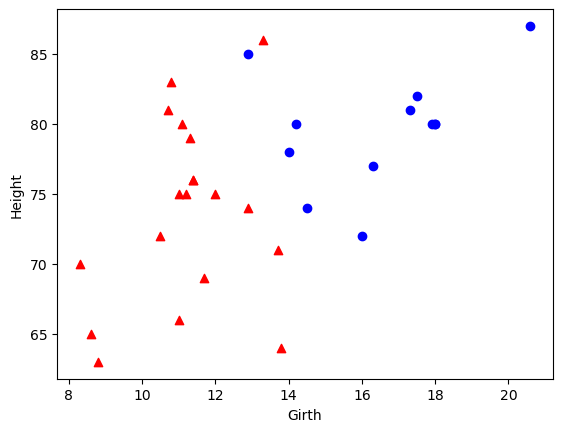

In [61]:
for x, y, m in zip(data['Girth'].values, data['Height'].values, data['mark'].values):
    plt.scatter(x, y, marker=m, c='blue' if m == 'o' else 'red')
plt.xlabel('Girth')
plt.ylabel('Height')

In [62]:
def h(X, theta):
    return 1/(1+ np.e ** (-np.dot(X, theta.T)))

In [63]:
data.insert(1, 'bias', np.ones(data.shape[0]))

In [68]:
for i in range(3):
    data.insert(1, f'g{i}h{2-i}', (data.Girth ** i) * (data.Height ** (2-i)))

In [74]:
X = data.loc[:, ['bias', 'Girth', 'Height', 'g2h0', 'g1h1', 'g0h2']].values
maxs = []
for i in range(X.shape[1]):
    maxs.append(np.max(X[:, i]))
    X[:, i] = X[:, i]/np.max(X[:, i])
y = data.loc[:, 'Volume']

In [72]:
theta     = np.random.rand(X.shape[1])
theta_aux = np.random.rand(X.shape[1])

In [77]:
ALPHA = 0.1
L     = 0.5
m     = X.shape[0]
n     = X.shape[1]

In [78]:
for _ in range(10000):
    for j in range(n):
        acc = 0
        for i in range(m):
            acc += (h(X[i, :], theta) - y[i]) * X[i, j] + L/m * theta[j] if j > 0 else (h(X[i, :], theta) - y[i]) * X[i, j]
        theta_aux[j] = theta[j] - ALPHA/m * acc
    theta = theta_aux

In [80]:
predict_y = [0 if h(X[i, :], theta) < 0.5 else 1 for i in range(m)]

Text(0, 0.5, 'Height')

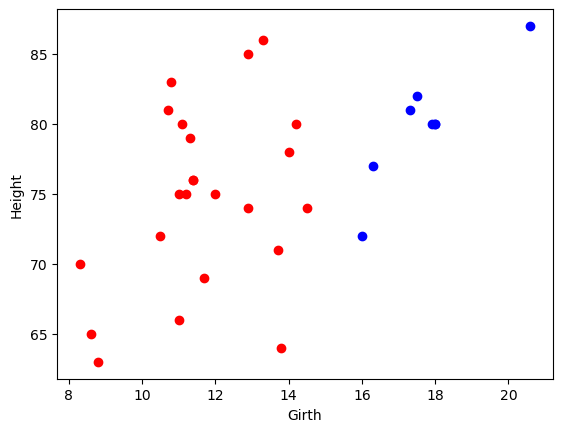

In [82]:
for x, y, m in zip(data['Girth'].values, data['Height'].values, predict_y):
    plt.scatter(x, y, marker='o', c='blue' if m == 1 else 'red')
plt.xlabel('Girth')
plt.ylabel('Height')